In [17]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Watts and Strogatz’s small-world network model

1. We start from a ring of nodes, each node being connected to their immediate and next neighbors. Here I have taken 100 nodes and each node is connected to 4 nearest neighbors.

2. Select a node and the edge that connects it to its nearest neighbour in a clockwise sense. With rewiring probability p ,reconnect this edge to a vertex chosen uniformly at random over the entire ring, with duplicate edges forbidden; otherwise leave the edge in place.A random number between 0-1 is generated and if the number is less than p, then rewiring is done by randomly choosing a node.

3. Repeat this process by moving clockwise around the ring, considering each vertex in turn until one iteration is completed.

4. Next, consider the edges that connect vertices to their second-nearest neighbours clockwise.

5. As there are nk/2 edges in the entire graph, the rewiring process stops after k/2 iterations.

In this question, I have implemented the whole algorithm from scratch without using any libraries for graph generation or manipulation.

 The below function calculates average clustering coefficient for original graph.
 Calculating clustering coefficient of a node n = (number of edges between neighbors of the node n)/ (maximum possible edges between neighbors of node n). Clustering coefficient of each node is stored in a list clustering coeff and then average clustering coefficient is calculted which is coming 0.5 for original network.

In [18]:

def Clustering_Coefficient_o(adjacency_list,edge_list):
    clustering_coeff=[]
    for i in adjacency_list:
        neighbors=adjacency_list[i]
        count=0
        n_=len(neighbors)
        max_neigh_edges=(n_*(n_-1))/2
#     print(max_neigh_edges)
        for n1 in range(len(neighbors)):
            for n2 in range(n1+1,len(neighbors)):
                if (neighbors[n1],neighbors[n2]) in edge_list or (neighbors[n2],neighbors[n1]) in edge_list:
                    count+=1
        if max_neigh_edges!=0:
            coeff=count/max_neigh_edges
            clustering_coeff.append(coeff)
    avg_cc=sum(clustering_coeff)/n
    return avg_cc

The below function calculates shortest path between source and destination nodes using BFS for original graph

In [19]:
#https://www.geeksforgeeks.org/building-an-undirected-graph-and-finding-shortest-path-using-dictionaries-in-python/
shortest_paths=[]
def BFS_for_finding_Shortest_path_o(source, destination,adjacency_list): 
    visited = [] 
    #storing source node in a queue
    queue = [[source]] 
    if source == destination: 
        shortest_paths.append(0)
        return 
    #checking while queue is not empty
    while queue: 
        visited_path = queue.pop(0) 
        vertex = visited_path[-1]  
        if vertex not in visited: 
            neighbouring_nodes = adjacency_list[vertex] 
            for neighbour in neighbouring_nodes: 
                new_visited_path = list(visited_path) 
                new_visited_path.append(neighbour) 
                queue.append(new_visited_path) 
                # Condition to check if the neighbour node is the destination node 
                if neighbour == destination: 
                    shortest_paths.append(len(new_visited_path)-1)
                    return
            visited.append(vertex) 
#     print("Path does not exists") 
    return 

Creating k regular graph such that each node in the graph is connected with k nearest neighbors and calculating its average path length and clustering coefficient

In [20]:
#creating k regular graph such that each node in the graph is connected with k nearest neighbors
def create_k_regular_graph(n,k):
    final_deg_seq=[]
    mat=np.zeros((n,n))
#     initializing n*n matrix with all zeros
    #creating k regular graph matrix such that each node is connected with k nearest neighbors
    for i in range(n):
        x=i
        y=i
        temp=[]
        for j in range(k//2):
            x=x+1
            y=y-1
            if(x==n):
                x=0
            if(y<0):
                y=n-1
            mat[i][x]=1
            mat[i][y]=1
            temp.append((i,x))
        final_deg_seq.append(temp)
    knn_dict={}
    #knn_dict is a dictionary where key contains the values of k and values represents list of all the edges which are 
    # at dictance k from each other in clockwise direction
    # example {1:[(1,2),(2,3),(3,4)], 2:[(1,3),(2,4)]} means nodes (1,2),(2,3) and (3,4) are at distance 1 from each other and 
    # nodes (1,3) and (2,4) are at distance 2(2nd nearest neighbor) from each other
    c=1
    for p in range(len(final_deg_seq[0])):
        t1=[]
        for q in range(len(final_deg_seq)):
            t1.append(final_deg_seq[q][p])
        knn_dict[c]=t1
        c=c+1
    # returning final adjacency matrix and knn dictionary
    adjacency_list={} #contains neighbors of each node
    it=0
    for row in mat:
        temp=[]
        for v in range(len(row)):
            if row[v]==1:
                temp.append(v)
        adjacency_list[it]=temp
        it+=1
    edge_list=[] # edge list contains all the edge pairs of the final network
    for i in range(len(mat)):
        for j in range(len(mat)):
            if(mat[i][j]==1):
                edge_list.append((i,j))
    cc=Clustering_Coefficient_o(adjacency_list,edge_list)# average clustering coefficient
    node_list=[]
    for a in adjacency_list:
        node_list.append(a)
    for i in range(len(node_list)):
        for j in range(i+1,len(node_list)):
            BFS_for_finding_Shortest_path_o(node_list[i], node_list[j],adjacency_list)
    pl=sum(shortest_paths)/(n*(n-1)/2)
    return mat,knn_dict,cc,pl

In [21]:
n=100
k=4
adj_matrix,knn_dictionary,original_clus_coeff,original_path_len=create_k_regular_graph(n,k)
print("Average clustering coefficient of original network is :" ,original_clus_coeff )
print("Average path length of original network is :" ,original_path_len )
# print(dic)

Average clustering coefficient of original network is : 0.5
Average path length of original network is : 12.878787878787879


Below function calculates shortest path between source and destination nodes using BFS of small world network

In [22]:
#https://www.geeksforgeeks.org/building-an-undirected-graph-and-finding-shortest-path-using-dictionaries-in-python/

def BFS_for_finding_Shortest_path(source, destination,shortest_paths,adjacency_list): 
    visited = [] 
    #storing source node in a queue
    queue = [[source]] 

    if source == destination: 
        shortest_paths.append(0)
        return 
    #checking while queue is not empty
    while queue: 
        visited_path = queue.pop(0) 
        vertex = visited_path[-1]  
        if vertex not in visited: 
            neighbouring_nodes = adjacency_list[vertex] 

            for neighbour in neighbouring_nodes: 
                new_visited_path = list(visited_path) 
                new_visited_path.append(neighbour) 
                queue.append(new_visited_path) 
                  
                # Condition to check if the neighbour node is the destination node 
                if neighbour == destination: 
                    shortest_paths.append(len(new_visited_path)-1)
                    return
            visited.append(vertex) 
    print("Path does not exists") 
    return 

The below function calculates average clustering coefficient of small world network.
Calculating clustering coefficient of a node n = (number of edges between neighbors of the node n)/ (maximum possible edges between neighbors of node n). 

In [23]:
def Clustering_Coefficient(adjacency_list,edge_list):
    clustering_coeff=[]
    for i in adjacency_list:
        neighbors=adjacency_list[i]
        count=0
        n_=len(neighbors)
        max_neigh_edges=(n_*(n_-1))/2
#     print(max_neigh_edges)
        for n1 in range(len(neighbors)):
            for n2 in range(n1+1,len(neighbors)):
                if (neighbors[n1],neighbors[n2]) in edge_list or (neighbors[n2],neighbors[n1]) in edge_list:
                    count+=1
        if max_neigh_edges!=0:
            coeff=count/max_neigh_edges
            clustering_coeff.append(coeff)
    avg_cc=sum(clustering_coeff)/n
    return avg_cc

# Creating small world network 
For different rewiring probabilities, I have created a small world by following Watts and Strogatz staregy. For each rewiring probability , scaled clustering coefficient and scaled path length has been calculated.

In [24]:
prob=[0.001,0.004,0.006,0.008,0.01,0.04,0.06,0.08,0.1,0.2, 0.5] #taking different values of rewiring probability
scaled_avg_path_length=[] #stores scaled path length for each value of rewiring probability
scaled_clust_coeffs=[] #stores scaled clustering coefficient for each value of rewiring probability
for p in prob:
    adj_mat=adj_matrix
    for i in range(k//2): #loop k/2 times
        for d in (knn_dictionary):
            if d== i+1:
                for d1 in knn_dictionary[d]:
                    val=random.uniform(0,1) #generating random number between 0-1 and comparing it with rewiring probability value
                    if(val<p):
                        nod=random.randint(0,9)
                        if(nod in d1):
#                             print(d,nod,d1)
                            continue
                        else:
#                             print(d,nod,d1,"he")
                            adj_mat[d1[0]][d1[1]]=0 #removing old edge
                            adj_mat[d1[1]][d1[0]]=0
                            adj_mat[d1[0]][nod]=1 # rewiring edge
                            adj_mat[nod][d1[0]]=1
                    else:
                        continue
    edge_list=[] # edge list contains all the edge pairs of the final network
    for i in range(len(adj_mat)):
        for j in range(len(adj_mat)):
            if(adj_mat[i][j]==1):
                edge_list.append((i,j))
    adjacency_list={} #contains neighbors of each node
    it=0
    for row in adj_mat:
        temp=[]
        for v in range(len(row)):
            if row[v]==1:
                temp.append(v)
        adjacency_list[it]=temp
        it+=1
# print(adjacency_list)
    path_length=[]  #stores path length for final network
    cc1=Clustering_Coefficient(adjacency_list,edge_list)
    print("Average clustering coeff for p= ",p, " is: ", cc1/original_clus_coeff)
    node_list=[]
    for a in adjacency_list:
        node_list.append(a)
    
    for i in range(len(node_list)):
        for j in range(i+1,len(node_list)):
            BFS_for_finding_Shortest_path(node_list[i], node_list[j],path_length,adjacency_list)
    total_edges=(n*(n-1))/2
    pl1=sum(path_length)/total_edges
    print("Average path length for p= ",p, " is: ", pl1/original_path_len)
    apl=pl1/original_path_len
    acc=cc1/original_clus_coeff
    scaled_avg_path_length.append(apl)
    scaled_clust_coeffs.append(acc)

Average clustering coeff for p=  0.001  is:  1.0
Average path length for p=  0.001  is:  1.0
Average clustering coeff for p=  0.004  is:  1.0
Average path length for p=  0.004  is:  1.0
Average clustering coeff for p=  0.006  is:  0.9646666666666668
Average path length for p=  0.006  is:  0.8636078431372549
Average clustering coeff for p=  0.008  is:  0.9233333333333335
Average path length for p=  0.008  is:  0.7196078431372549
Average clustering coeff for p=  0.01  is:  0.8913333333333334
Average path length for p=  0.01  is:  0.573192156862745
Average clustering coeff for p=  0.04  is:  0.8074761904761907
Average path length for p=  0.04  is:  0.407764705882353
Average clustering coeff for p=  0.06  is:  0.7408571428571429
Average path length for p=  0.06  is:  0.3700705882352941
Average clustering coeff for p=  0.08  is:  0.5428571428571428
Average path length for p=  0.08  is:  0.31068235294117647
Average clustering coeff for p=  0.1  is:  0.41377633477633474
Average path length fo

In [25]:
print("Sclaed average path lengths for different values of p are: ", scaled_avg_path_length,"\n" )

print("Scaled average clustering coefficient for different values of p are: ",scaled_clust_coeffs)

Sclaed average path lengths for different values of p are:  [1.0, 1.0, 0.8636078431372549, 0.7196078431372549, 0.573192156862745, 0.407764705882353, 0.3700705882352941, 0.31068235294117647, 0.27761568627450983, 0.24864313725490197, 0.20947450980392154] 

Scaled average clustering coefficient for different values of p are:  [1.0, 1.0, 0.9646666666666668, 0.9233333333333335, 0.8913333333333334, 0.8074761904761907, 0.7408571428571429, 0.5428571428571428, 0.41377633477633474, 0.3985641259325472, 0.38091939831953275]


# Plotting graph for scaled clustering coefficient and scaled characterstic path length for 9 rewiring probability values.

The graph obtained is replica of the one given in assignment. It can be seen that the scaled characteristic path length and scaled clustering coefficient is high initially due to small value of rewiring probability.In other words we can say that initially when the randomness in the network was less, the network acts as a regular network with high path length and high scaled clusering coefficient.

As soon as the value of rewiring probability increases or the randomess in the network increases the values of clustering coefficient and avg path length also decreases. That is why when the rewiring probability is very high then the network becomes random network. The network in the intermedite values of probability are called small world network.

No handles with labels found to put in legend.


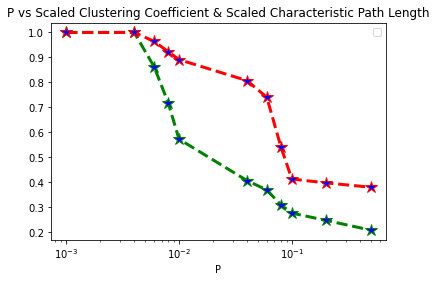

In [26]:
import matplotlib.pyplot as plt 
# plot lines 
# plt.scatter(prob, scaled_avg_path_length,c='green', label = "Scaled path length") 
plt.plot(prob, scaled_avg_path_length, color='green', linestyle='dashed', linewidth = 3,marker='*', markerfacecolor='blue', markersize=12)
plt.plot(prob, scaled_clust_coeffs, color='red', linestyle='dashed', linewidth = 3,marker='*', markerfacecolor='blue', markersize=12)
# plt.scatter(prob, scaled_clust_coeffs,c='red', label = "Scaled Clustering coef") 
plt.legend() 
plt.xlabel("P")
plt.xscale("log")
plt.title("P vs Scaled Clustering Coefficient & Scaled Characteristic Path Length")
plt.show()